In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Subset, random_split
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [14]:
def load_data(path, class_names):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Pad(223, padding_mode='reflect'),
        transforms.RandomAffine(degrees=15, shear=45),
        transforms.CenterCrop(224)
    ])

    dataset = ImageFolder(path, transform=transform)

    class_to_idx = dataset.class_to_idx
    selected_classes = [class_to_idx[c] for c in class_names]

    indices = [i for i, (path, label) in enumerate(dataset.samples) if label in selected_classes]
    subset_dataset = Subset(dataset, indices)

    dataset_size = len(subset_dataset)
    train_size = int(0.7 * dataset_size)
    val_size = int(0.15 * dataset_size)
    test_size = dataset_size - train_size - val_size

    train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, pin_memory=True)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, pin_memory=True)

    print("📃 Train Dataset Information:")
    class_counts_train = {cls: 0 for cls in class_names}
    for _, label in train_dataset:
        class_name = dataset.classes[label]
        class_counts_train[class_name] += 1

    for cls_name, count in class_counts_train.items():
        print(f"\tNumber of images in class {cls_name}: {count}")
    print(f"\tTotal number of training samples: {len(train_dataset)}")

    print("\n📃 Validation Dataset Information:")
    class_counts_val = {cls: 0 for cls in class_names}
    for _, label in val_dataset:
        class_name = dataset.classes[label]
        class_counts_val[class_name] += 1

    for cls_name, count in class_counts_val.items():
        print(f"\tNumber of images in class {cls_name}: {count}")
    print(f"\tTotal number of validation samples: {len(val_dataset)}")

    print("\n📃 Test Dataset Information:")
    class_counts_test = {cls: 0 for cls in class_names}
    for _, label in test_dataset:
        class_name = dataset.classes[label]
        class_counts_test[class_name] += 1

    for cls_name, count in class_counts_test.items():
        print(f"\tNumber of images in class {cls_name}: {count}")
    print(f"\tTotal number of test samples: {len(test_dataset)}")
    
    return train_loader, val_loader, test_loader

In [15]:
def imshow_grid(batch, labels):
    
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))

    for i in range(16):
        image = batch[i].permute(1, 2, 0).numpy()
        label = labels[i]

        ax = axes[i // 4, i % 4]
        ax.imshow(image)
        ax.set_title(f"{label}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

📃 Train Dataset Information:
	Number of images in class Foodwaste: 1418
	Number of images in class Glass: 1060
	Number of images in class Metal: 1403
	Number of images in class Papers: 2104
	Number of images in class Plastic: 3835
	Number of images in class Textile: 680
	Total number of training samples: 10500

📃 Validation Dataset Information:
	Number of images in class Foodwaste: 297
	Number of images in class Glass: 208
	Number of images in class Metal: 287
	Number of images in class Papers: 473
	Number of images in class Plastic: 833
	Number of images in class Textile: 152
	Total number of validation samples: 2250

📃 Test Dataset Information:
	Number of images in class Foodwaste: 285
	Number of images in class Glass: 232
	Number of images in class Metal: 310
	Number of images in class Papers: 423
	Number of images in class Plastic: 832
	Number of images in class Textile: 168
	Total number of test samples: 2250


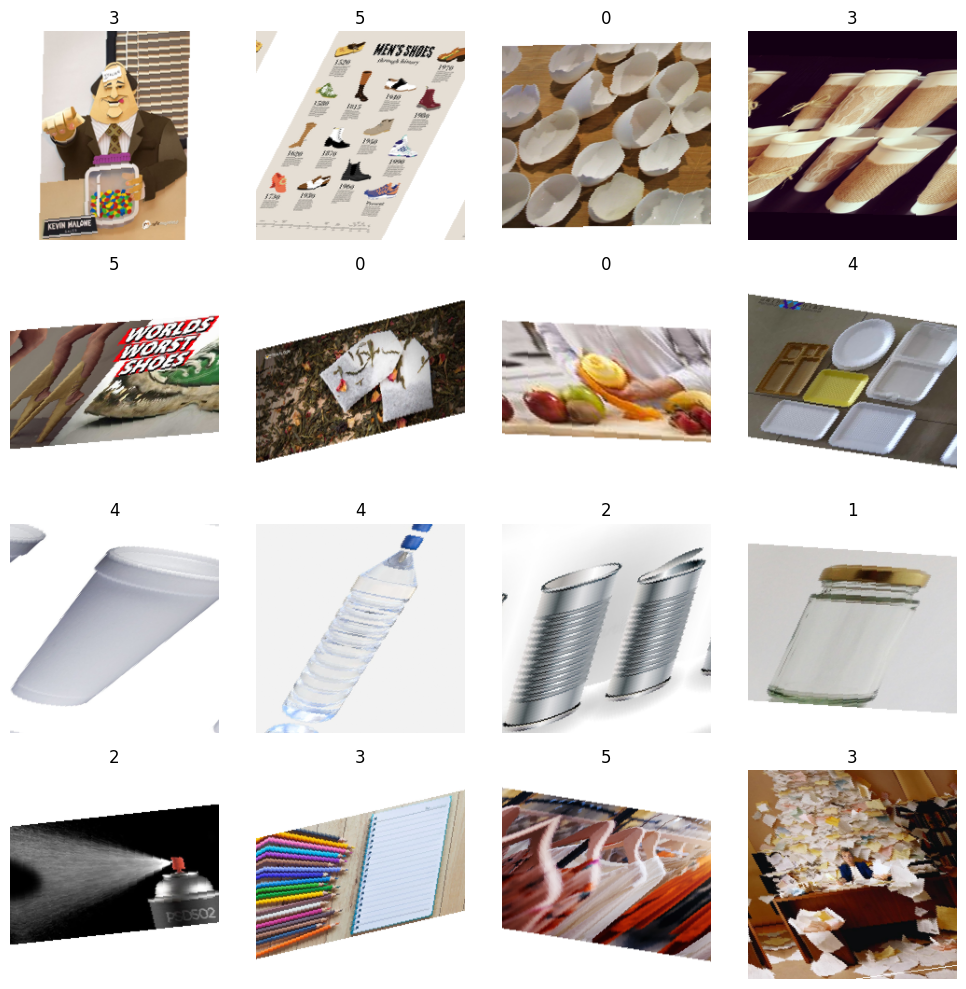

In [16]:
path = r'C:\Users\Nickv\Documents\ImageProcessing\Project\dataset\images'
class_names = [f'{name}' for name in os.listdir(path)]
train_loader, val_loader, test_loader = load_data(path, class_names)
batch, labels = next(iter(train_loader))
imshow_grid(batch, labels)